# All imports necessary

In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
import string

In [4]:
import os
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set(color_codes=True)

In [8]:
sns.set(font_scale=1.5)

In [9]:
from tqdm.autonotebook import tqdm

/home/bender/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [10]:
%matplotlib inline

In [11]:
from source.code.utils import filter_by_subcorpus
from source.code.utils import get_tagged_texts_as_pd

In [12]:
from source.code.preprocessing import additional_features
from source.code.preprocessing import filtrations

# Read the data

## Where are we at the moment

In [13]:
! pwd

/home/bender/PycharmProjects/NLP/notebooks


In [14]:
! ls -alth ../data/datasets/gmb-2.2.0/

итого 253M
-rw-rw-r--.   1 bender bender 177M сен 30 15:56 en.tags.pd.extracted.csv
drwxr-x---.   4 bender bender 4,0K сен 30 15:56 .
-rw-rw-r--.   1 bender bender  76M сен 27 02:43 en.raw.extracted.npy
drwxrwxr-x.   3 bender bender 4,0K сен 26 22:02 ..
-rw-r-----.   1 bender bender 7,4K июл  4  2014 README
-rw-rw-r--.   1 bender bender 2,0K июл  4  2014 NEWS
-rw-r-----.   1 bender bender  497 июл  2  2014 THANKS
drwxr-x---. 102 bender bender 4,0K июл  2  2014 data
-rw-r-----.   1 bender bender  279 июн 23  2014 LICENSE
drwxr-x---.   2 bender bender 4,0K авг 21  2013 doc


## Get the subset of folders for target subcorpus (Voice of America)

In [15]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

## Read subcorpus

In [16]:
tagged_texts_as_pd = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

## Do a bit of preprocessing

In [17]:
tagged_texts_as_pd_f = filtrations(tagged_texts_as_pd)

## Add new features describing words

In [18]:
tagged_texts_as_pd_f_add_f = additional_features(tagged_texts_as_pd_f)

## Take a bit of a look into the data

In [19]:
tagged_texts_as_pd_f_add_f.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
token,Former,Ecuadorean,President,Lucio,Gutierrez,has,formally,requested,political,asylum,in,Colombia,after,receiving,reports,he,is,wanted,in,his
pos_tag,JJ,NNP,NNP,NNP,NNP,VBZ,RB,VBN,JJ,NN,IN,NNP,IN,VBG,NNS,PRP,VBZ,VBN,IN,PRP$
lemma,former,ecuadorean,president,lucio,gutierrez,have,formally,request,political,asylum,in,colombia,after,receive,report,he,be,want,in,his
ner_tag,O,O,per,per,per,O,O,O,O,O,O,geo,O,O,O,O,O,O,O,O
word_net_sense_number,1,0,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0
verb_net_roles,[Topic],[],[],[],[],[],[],"[Topic,Agent]",[Topic],[],[],[],[],"[Theme,Agent]",[],[],[],"[Theme,Agent]",[],[]
semantic_relation,O,=,=,=,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,of
animacy_tag,O,Human,Human,Human,Human,O,O,O,O,Non-concrete,O,Place,O,O,Human,Human,O,O,O,Non-concrete
super_tag,N/N,N/N,N/N,N/N,N,(S[dcl]\NP)/(S[pt]\NP),(S[dcl]\NP)\(S[dcl]\NP),(S[pt]\NP)/NP,N/N,N,((S[pt]\NP)\(S[pt]\NP))/NP,N,((S[pt]\NP)\(S[pt]\NP))/(S[ng]\NP),(S[ng]\NP)/NP,N,NP,(S[dcl]\NP)/(S[pss]\NP),(S[pss]\NP)/PP,PP/NP,NP/N
lambda_dsr,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r...","lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100...","lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100...","lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100...","lam(v1,b1:drs([],[b1:[1005]:named(v1,gutierrez...","lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer...","lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer...","lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(...","lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r...","lam(v1,b1:drs([],[b1:[1010]:pred(v1,asylum,n,'...","lam(v1,lam(v2,lam(v3,lam(v4,app(app(v2,v3),lam...","lam(v1,b1:drs([],[b1:[1012]:named(v1,colombia,...","lam(v1,lam(v2,lam(v3,lam(v4,app(v3,lam(v5,app(...","lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(...","lam(v1,b1:drs([],[b1:[1015]:pred(v1,report,n,'...","lam(v1,alfa(pro,b1:drs([b1:[]:x1],[b1:[1016]:p...","lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer...","lam(v1,lam(v2,lam(v3,app(v2,lam(v4,merge(b1:dr...","lam(v1,lam(v2,app(v1,lam(v3,b1:drs([],[b1:[101...","lam(v1,lam(v2,alfa(pro,b1:drs([b1:[]:x1],[b1:[..."


In [20]:
tagged_texts_as_pd_f_add_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130555 entries, 0 to 1231277
Data columns (total 18 columns):
token                       1130555 non-null object
pos_tag                     1130555 non-null object
lemma                       1130555 non-null object
ner_tag                     1130555 non-null object
word_net_sense_number       1130555 non-null int64
verb_net_roles              1130555 non-null object
semantic_relation           1130555 non-null object
animacy_tag                 1130555 non-null object
super_tag                   1130555 non-null object
lambda_dsr                  1130555 non-null object
ner_tagged                  1130555 non-null int64
semantic_relation_tagged    1130555 non-null int64
animacy_tagged              1130555 non-null int64
lambda_dsr_len              1130555 non-null int64
word_sense_exists           1130555 non-null int64
is_title                    1130555 non-null int64
contains_digits             1130555 non-null int64
word_len   

# Words distributions (for all NER-tags in general)

## Words distribution across NER-tags

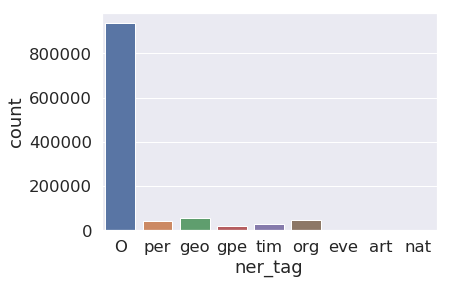

In [21]:
sns.countplot('ner_tag', data=tagged_texts_as_pd_f_add_f)
plt.show()

In [22]:
tagged_texts_as_pd_f_add_f.ner_tag.value_counts()

O      936477
geo     55427
org     44407
per     43118
tim     29799
gpe     19685
art       787
eve       575
nat       280
Name: ner_tag, dtype: int64

## Words distribution across sense numbers

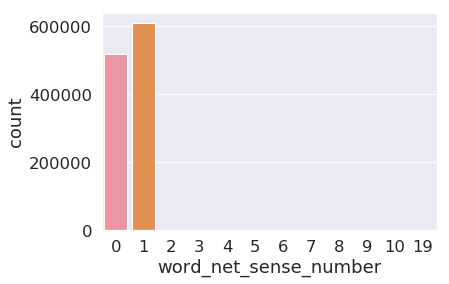

In [23]:
sns.countplot('word_net_sense_number', data=tagged_texts_as_pd_f_add_f)
plt.show()

## Words distribution across POS-tags

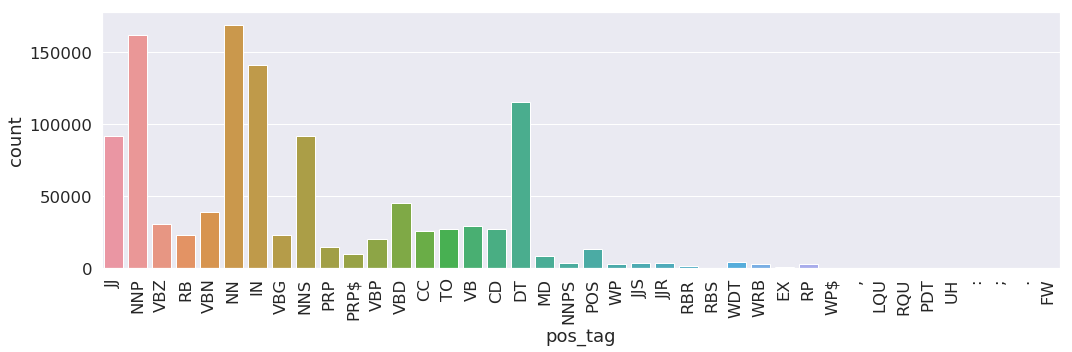

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('pos_tag', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across semantic relation prepositions

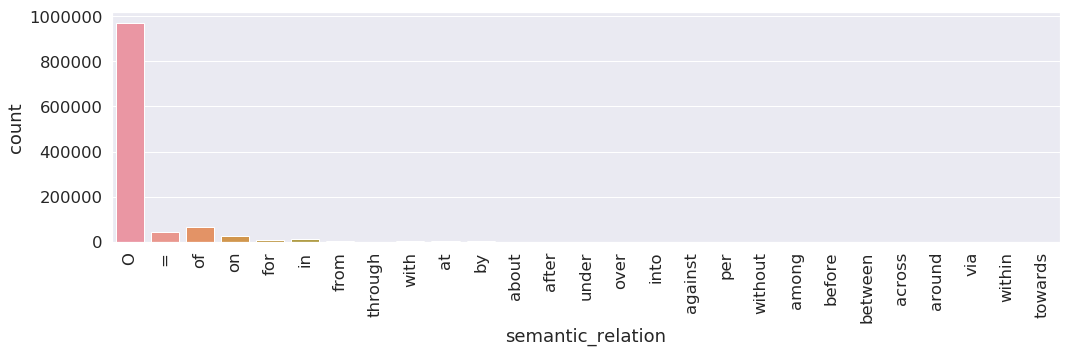

In [25]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('semantic_relation', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across animacy-tags

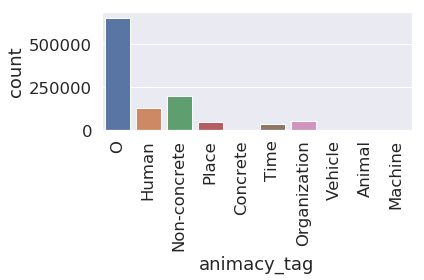

In [26]:
ax = sns.countplot('animacy_tag', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Words distributions (separated by each NER-tag)

## Words distribution across sense numbers

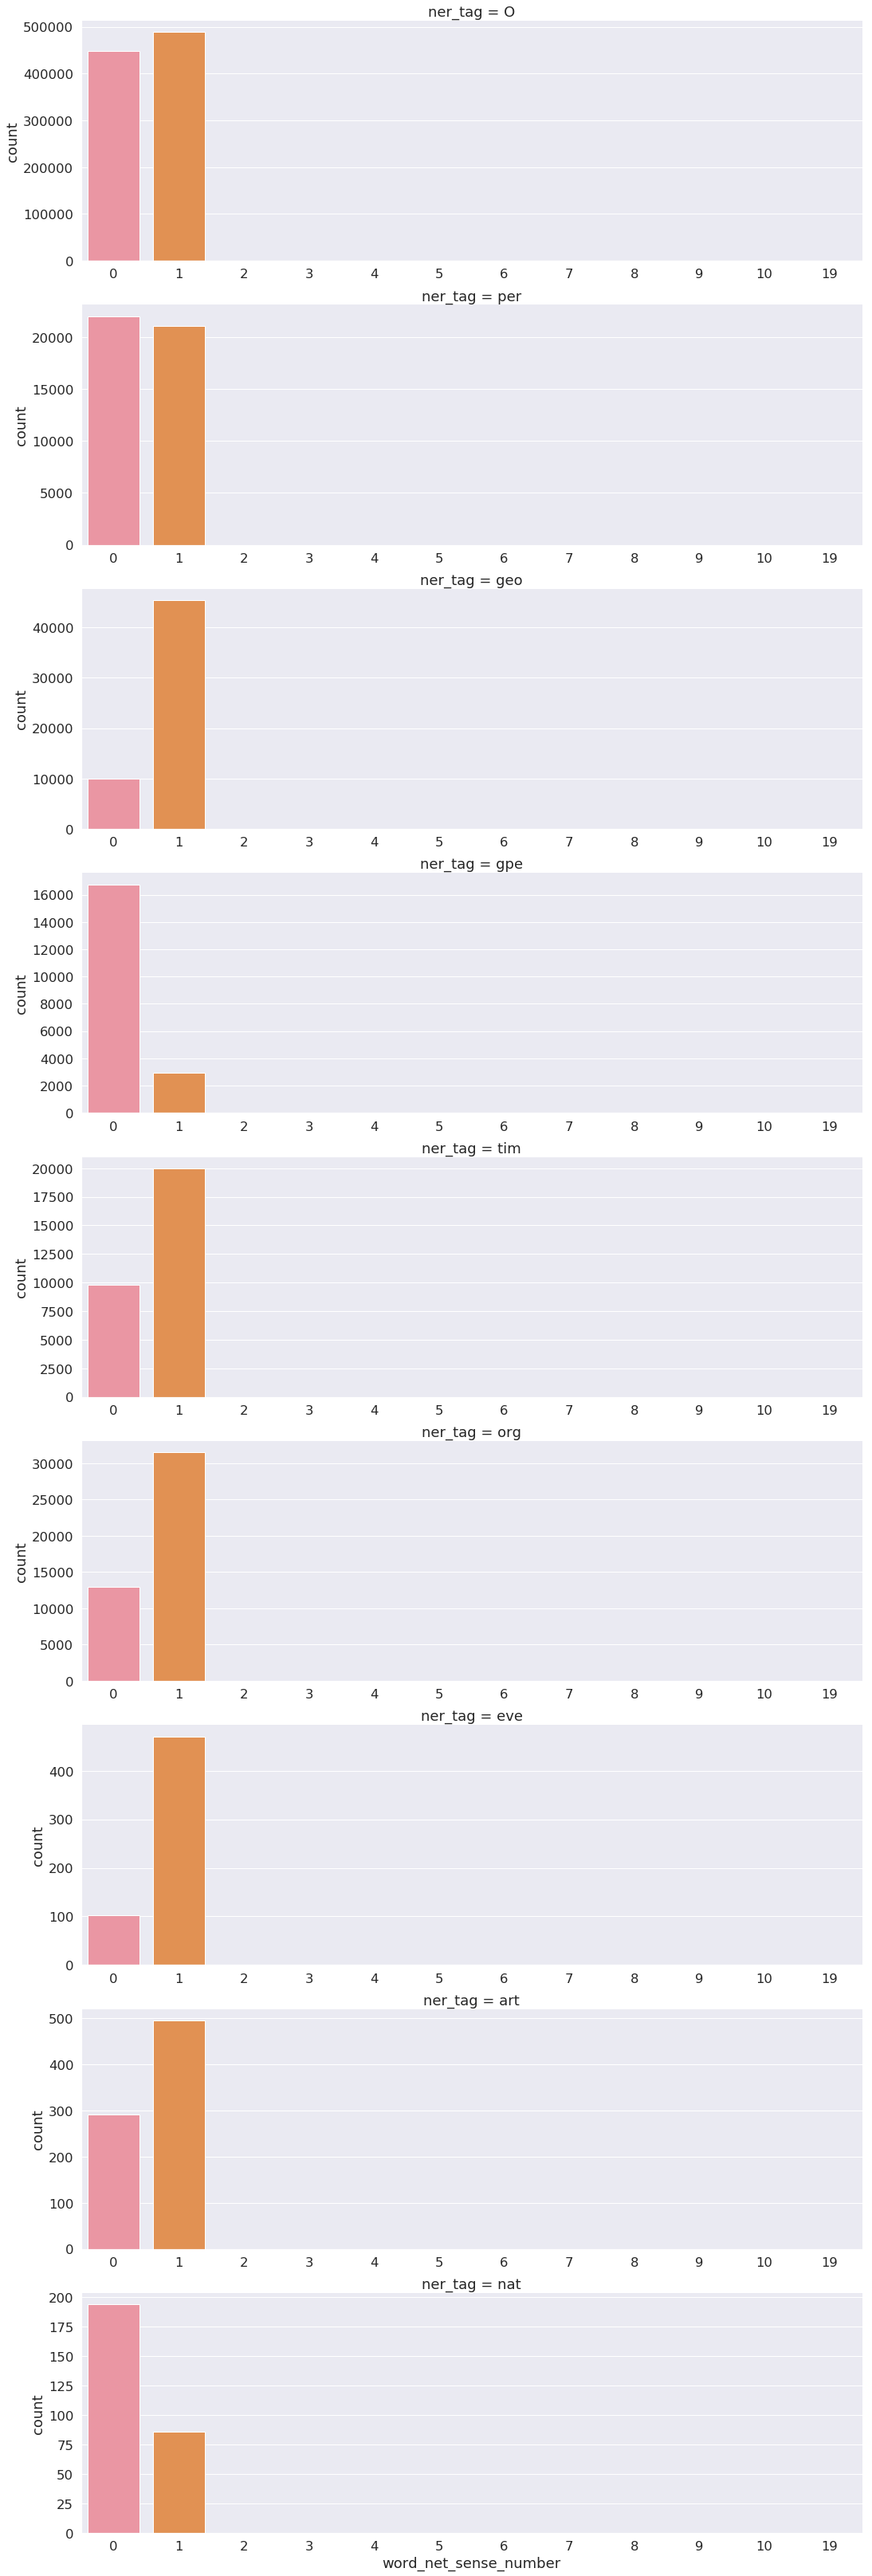

In [27]:
sns.catplot('word_net_sense_number', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
plt.show()

## Words distribution across POS-tags

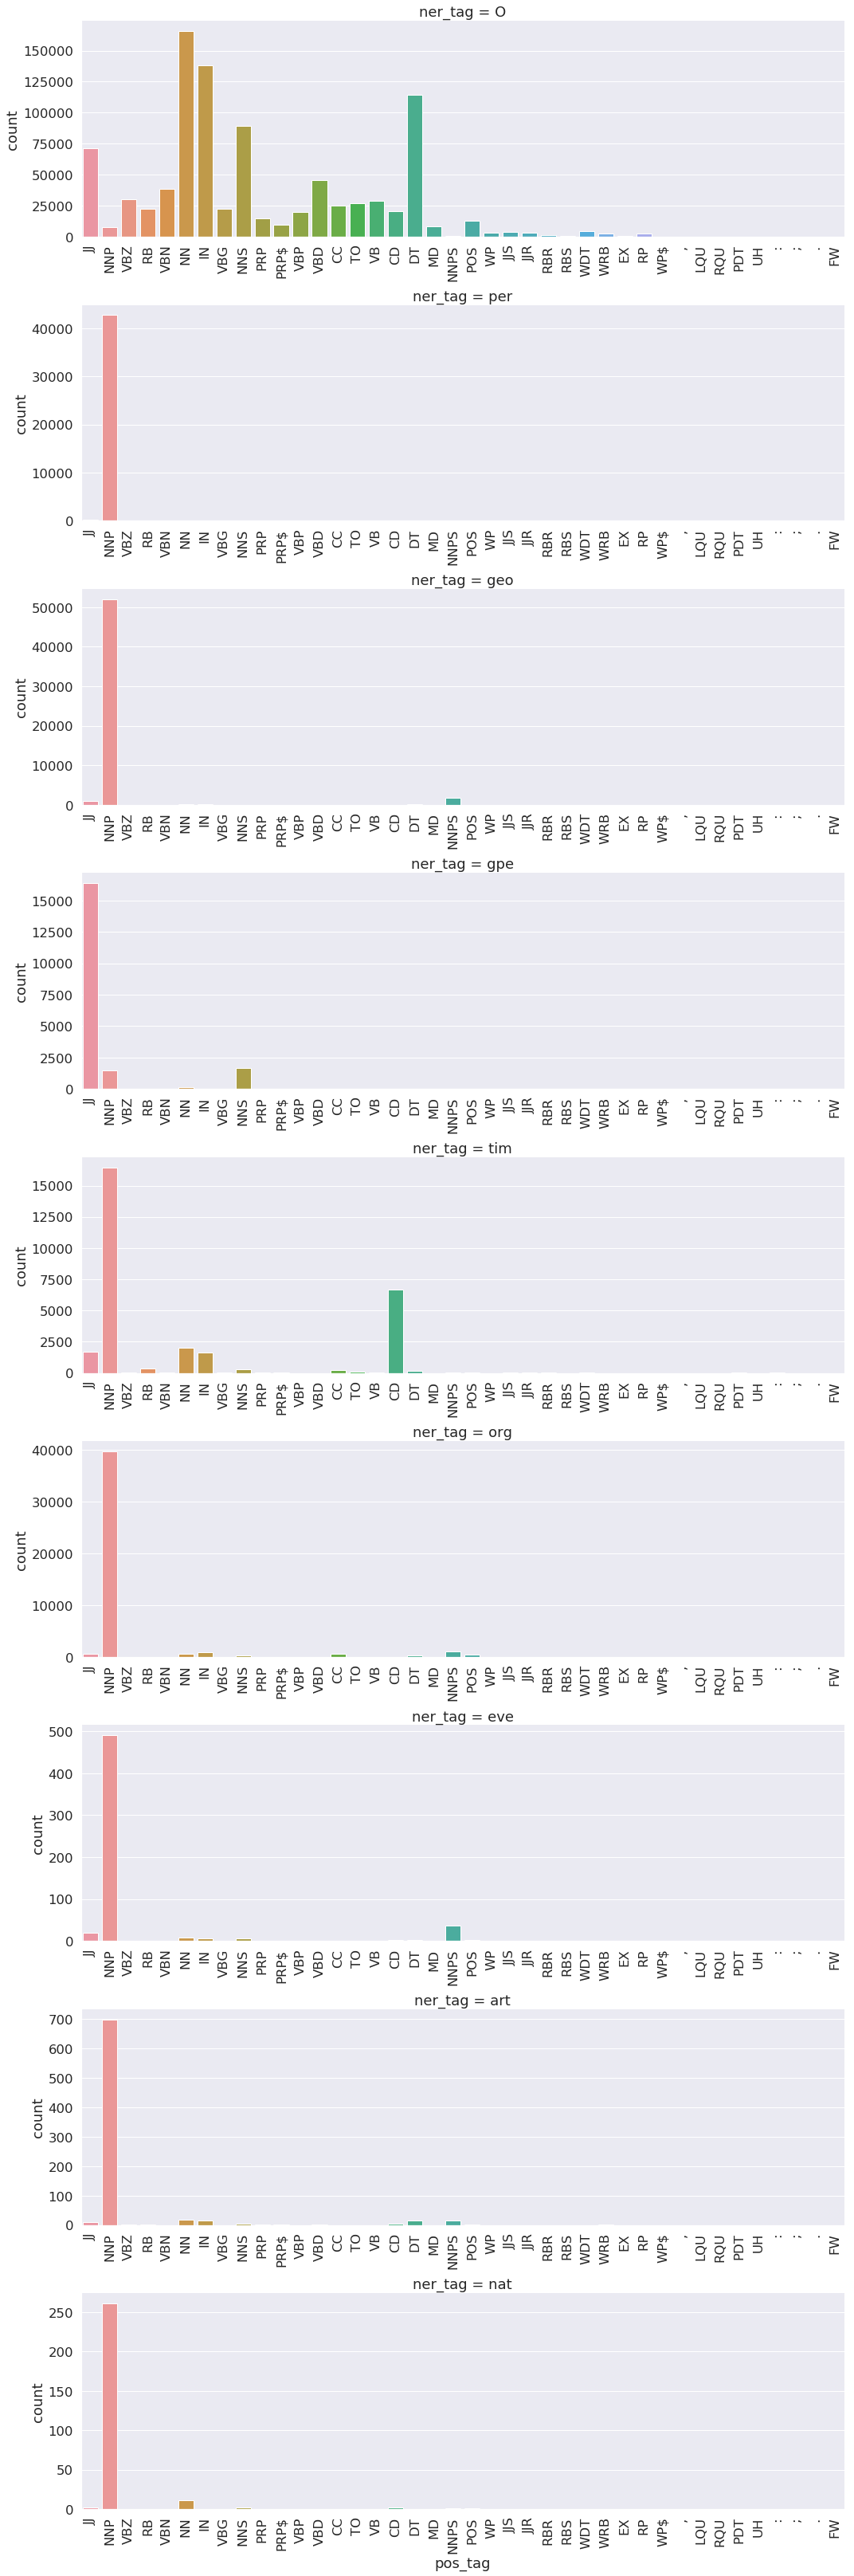

In [28]:
g = sns.catplot('pos_tag', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across semantic relation prepositions

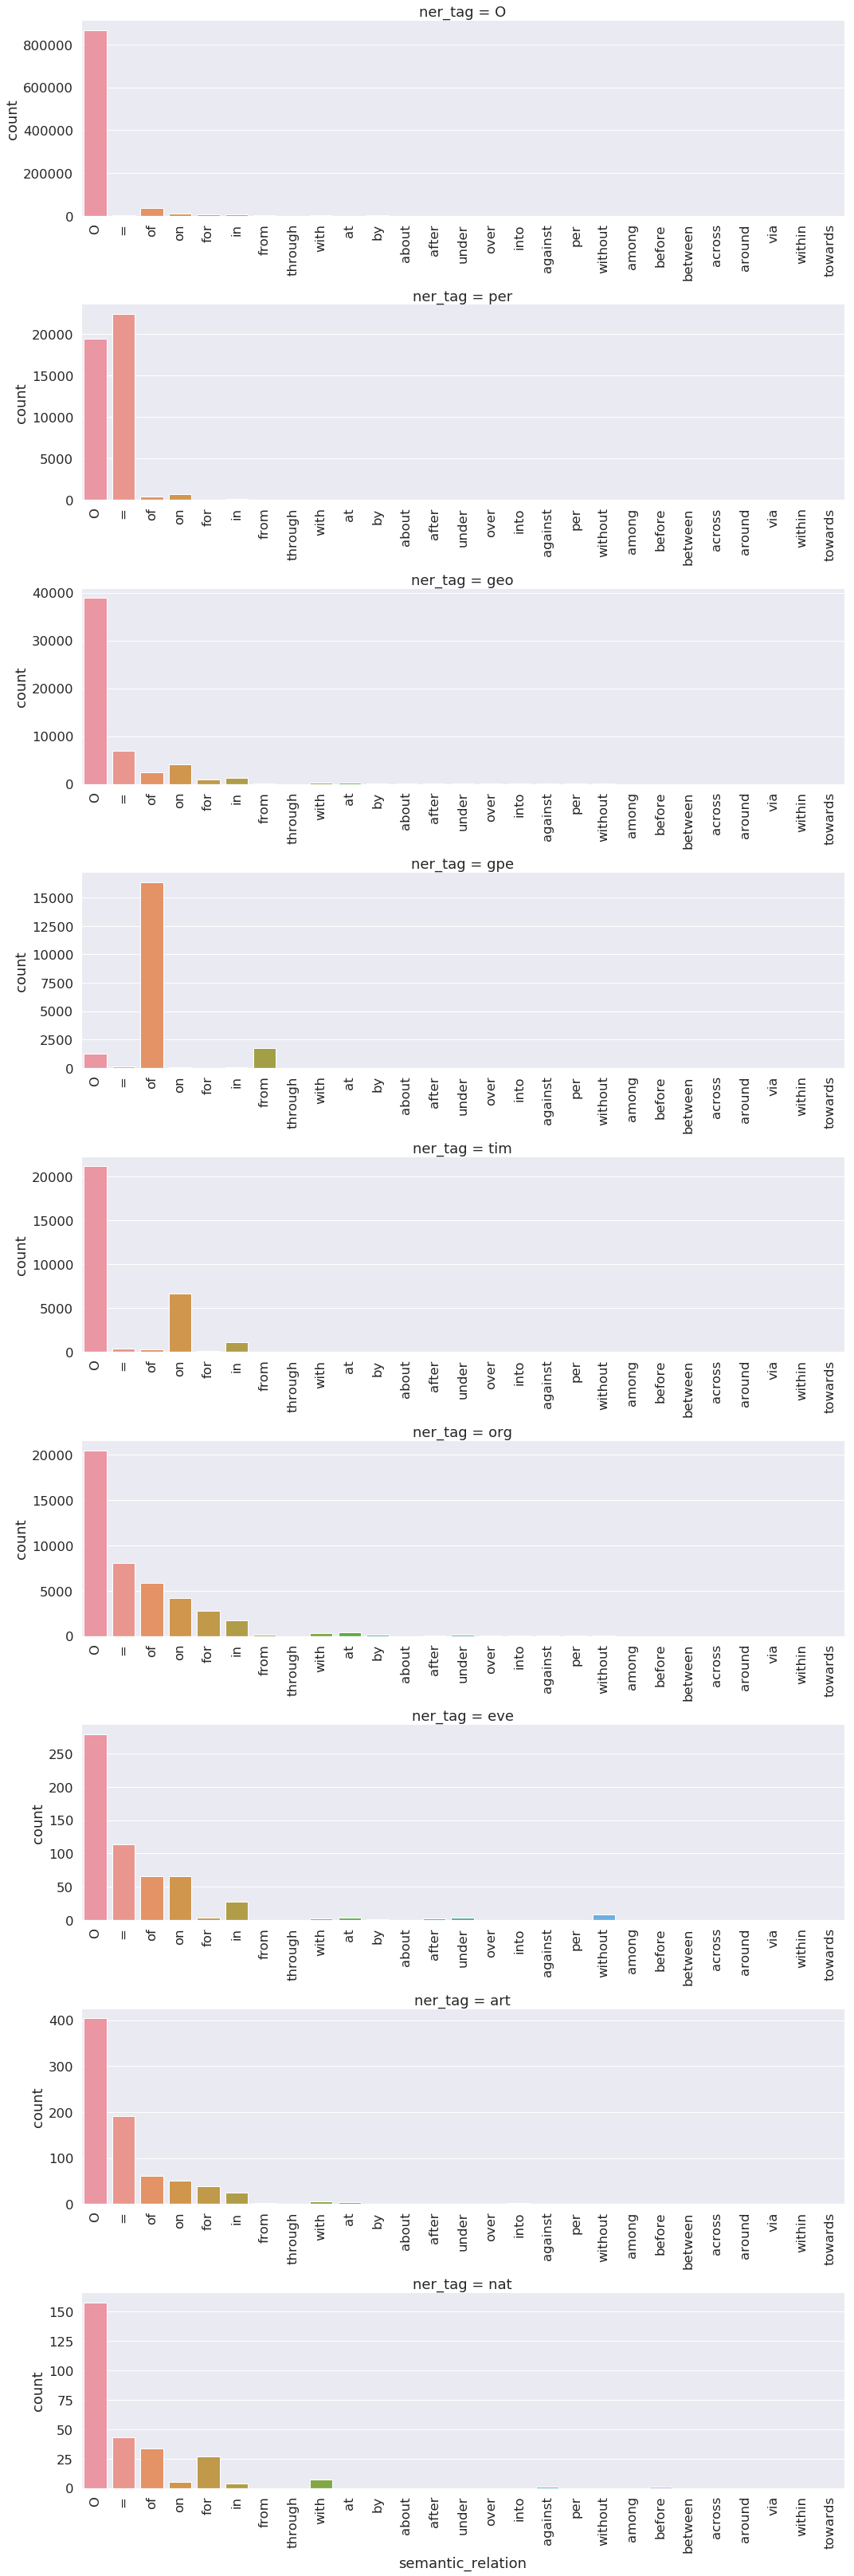

In [29]:
g = sns.catplot('semantic_relation', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across animacy-tags

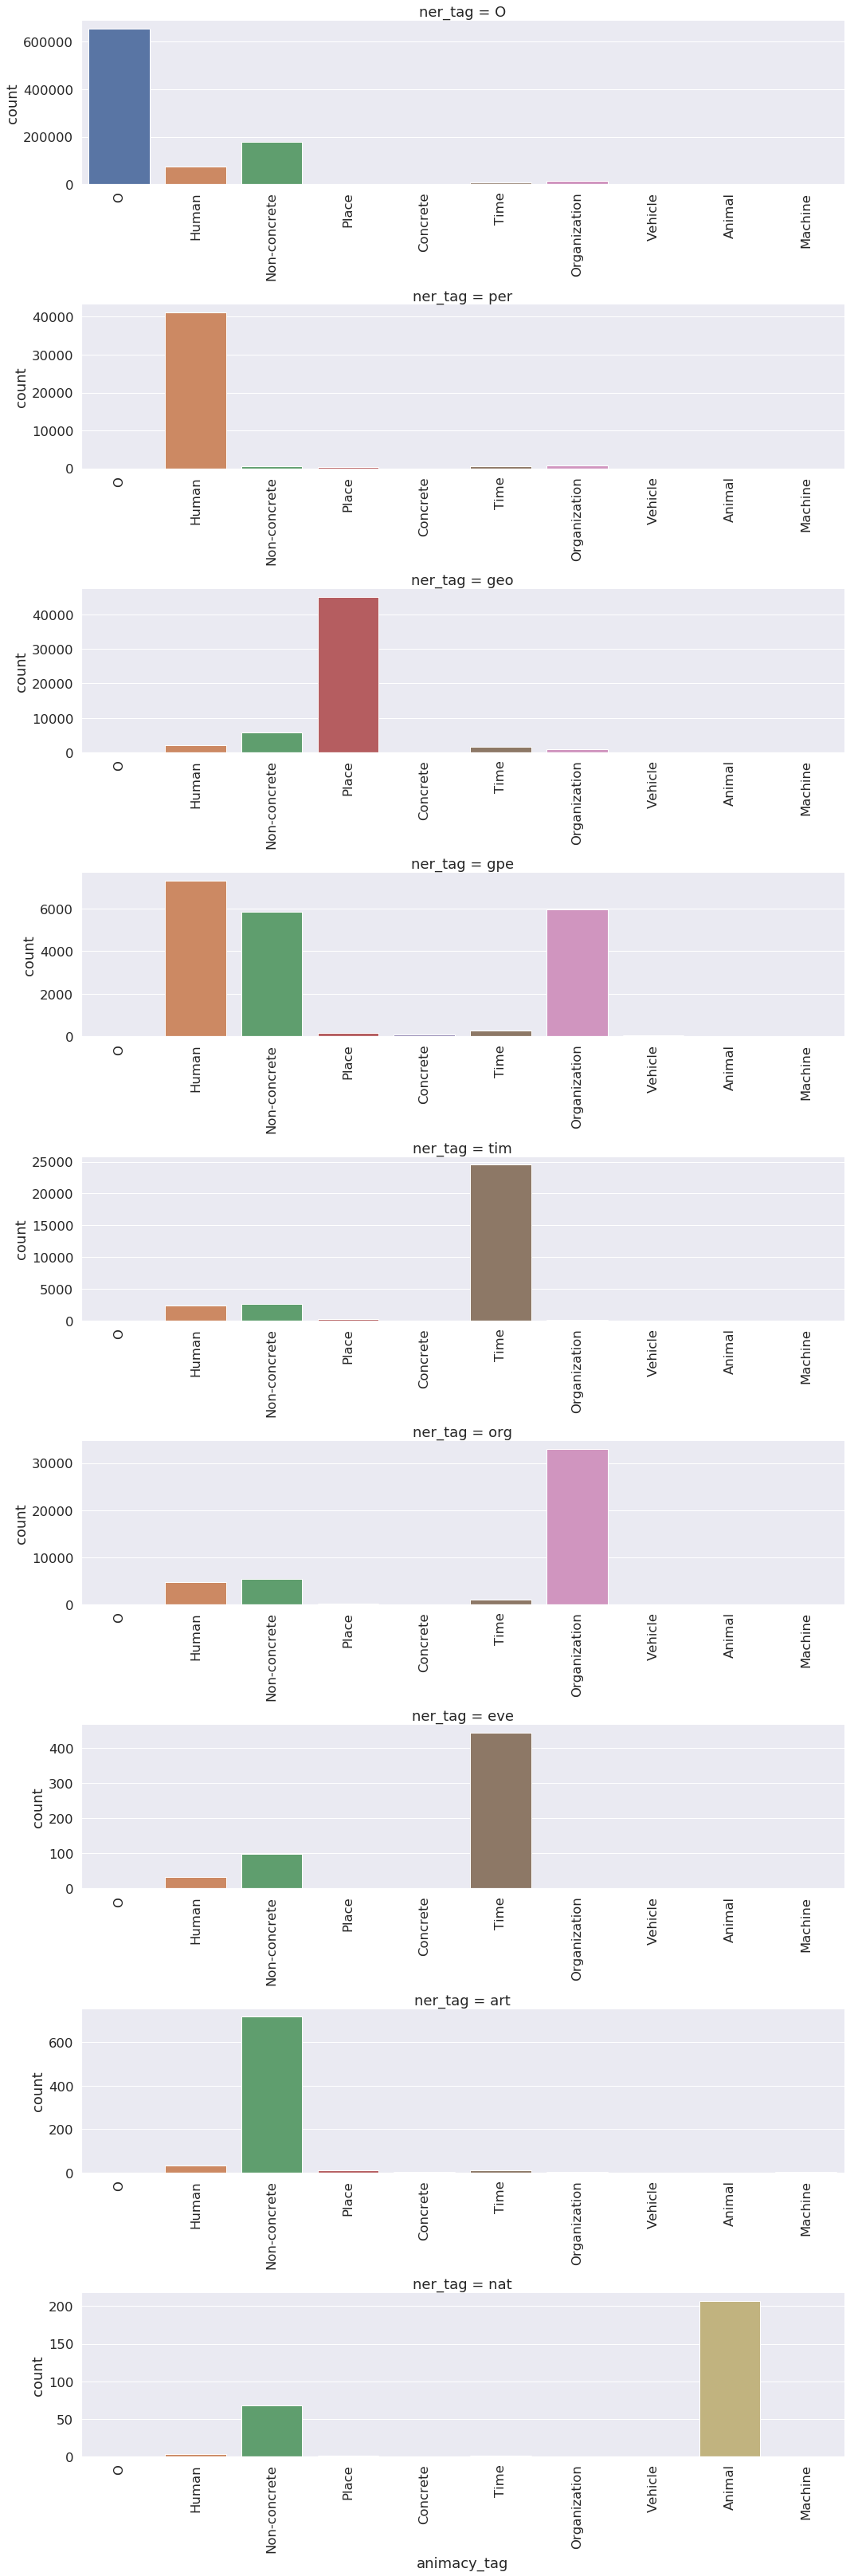

In [30]:
g = sns.catplot('animacy_tag', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across word lengths

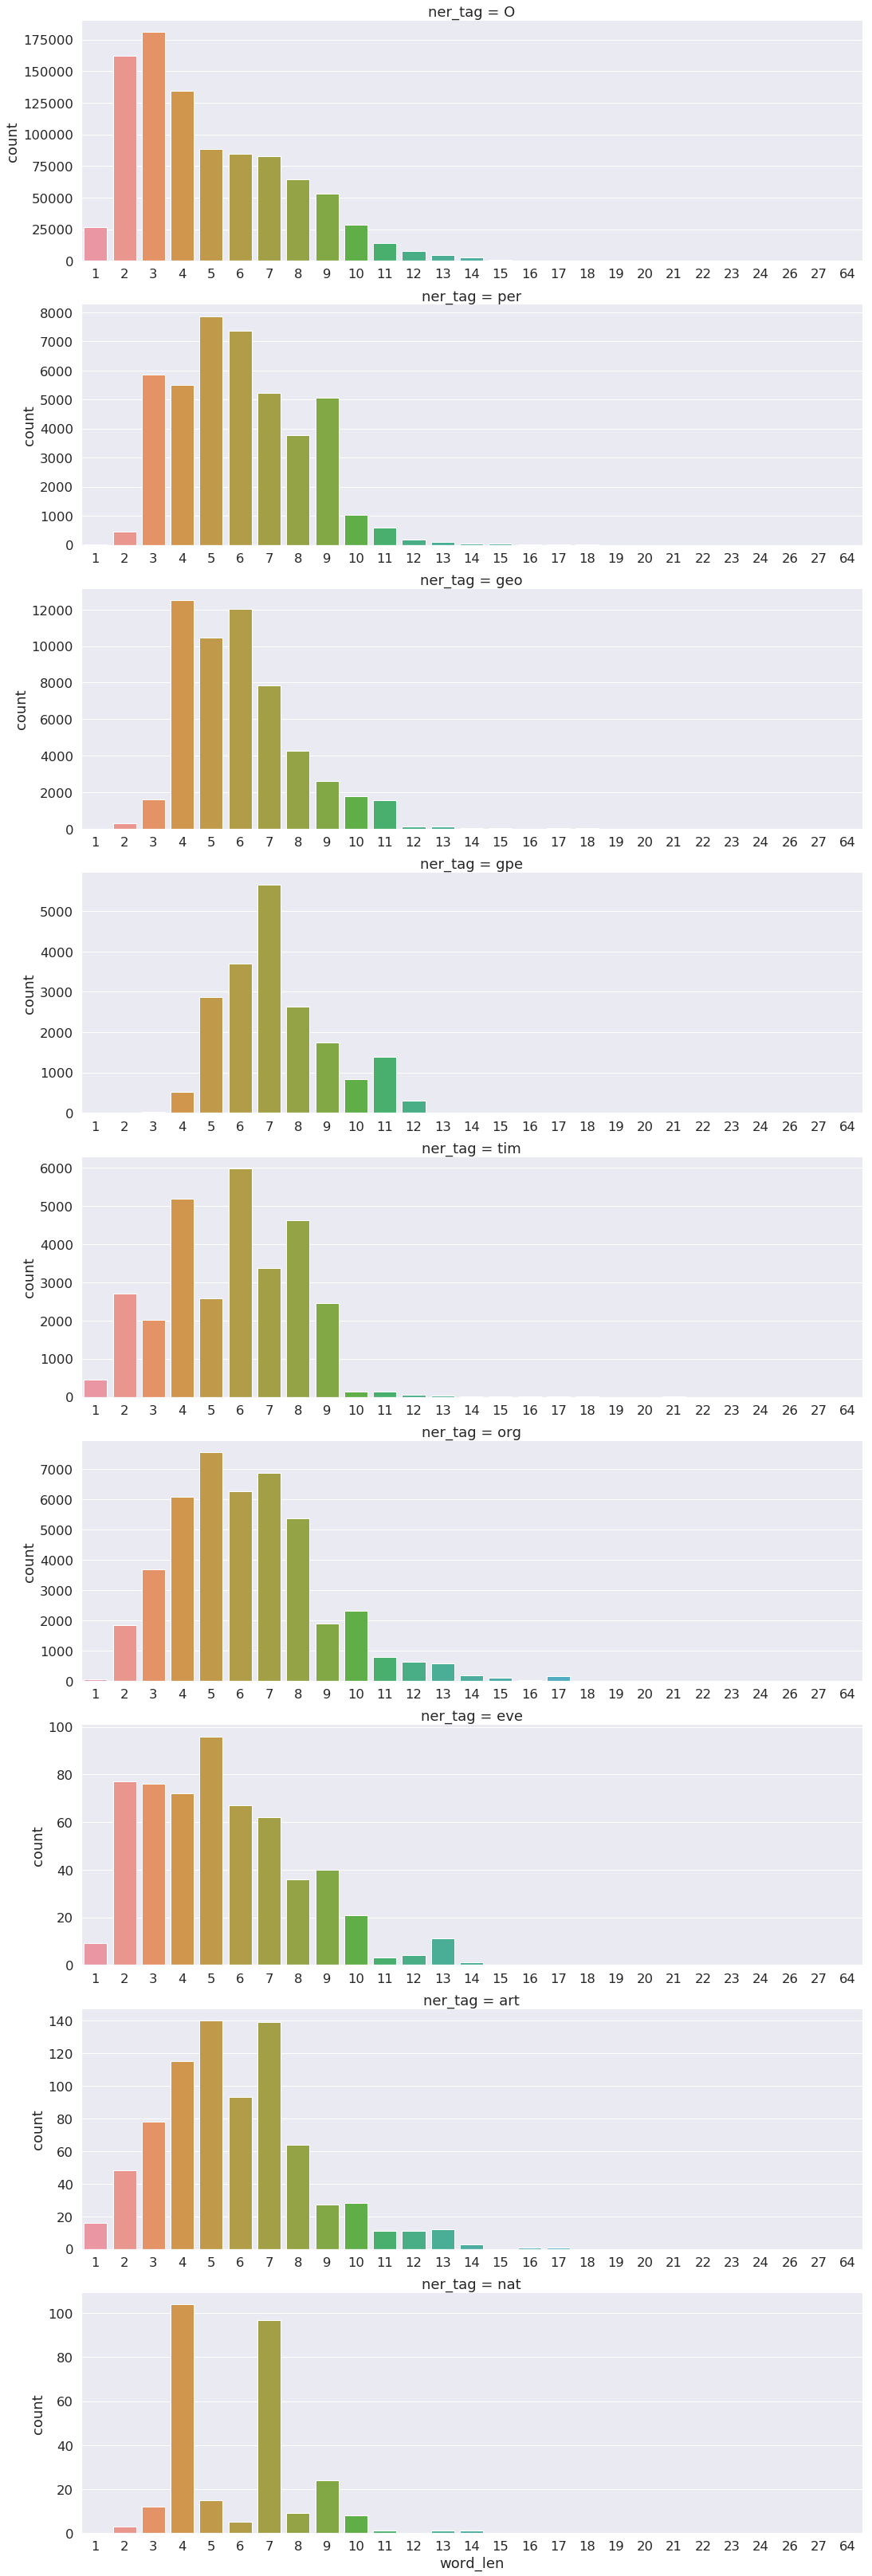

In [31]:
sns.catplot('word_len', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
plt.show()

## Words distribution across semantic relation existence

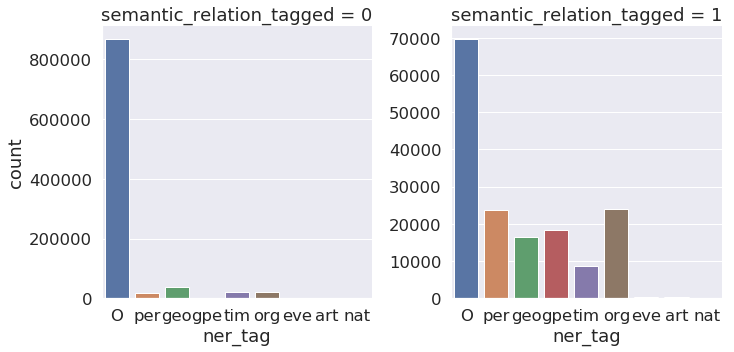

In [32]:
sns.catplot('ner_tag', col='semantic_relation_tagged', data=tagged_texts_as_pd_f_add_f, kind="count", sharex=False, sharey=False)
plt.show()

## Words distribution across animacy tag existence

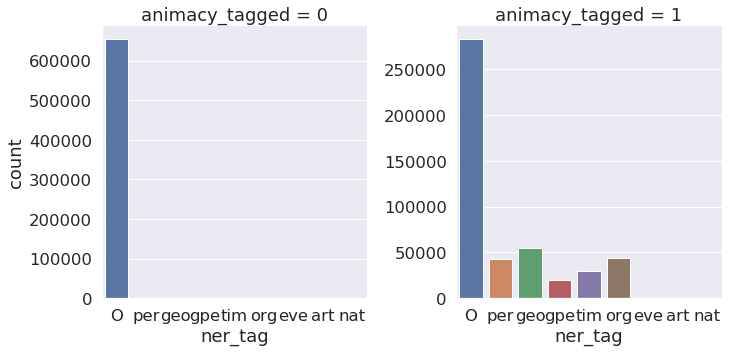

In [33]:
sns.catplot('ner_tag', col='animacy_tagged', data=tagged_texts_as_pd_f_add_f, kind="count", sharex=False, sharey=False)
plt.show()

## Words distribution across word sense existence

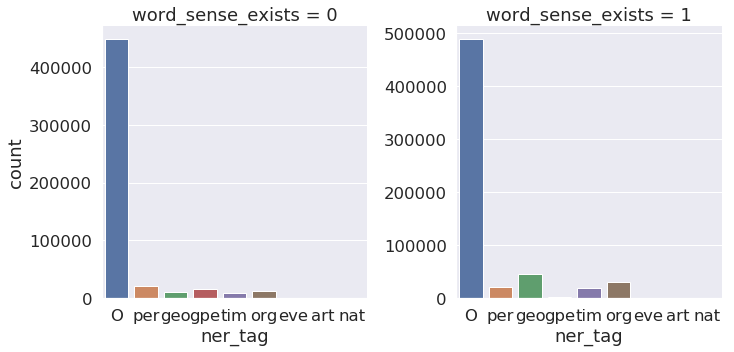

In [34]:
sns.catplot('ner_tag', col='word_sense_exists', data=tagged_texts_as_pd_f_add_f, kind="count", sharex=False, sharey=False)
plt.show()

## Words distribution across NER-tags (for titled and not titled words)

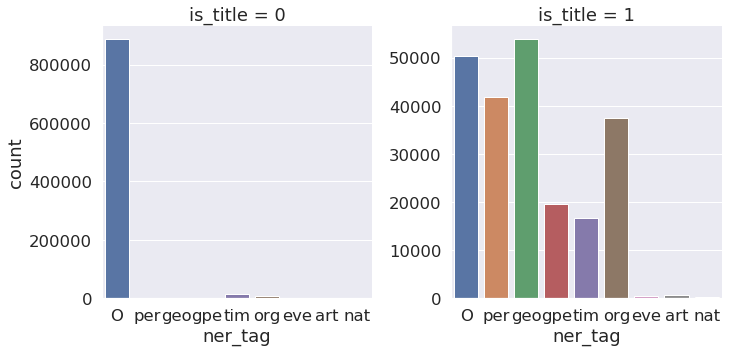

In [35]:
sns.catplot('ner_tag', col='is_title', data=tagged_texts_as_pd_f_add_f, kind="count", sharex=False, sharey=False)
plt.show()

## Words distribution across NER-tags (for words with and without digits)

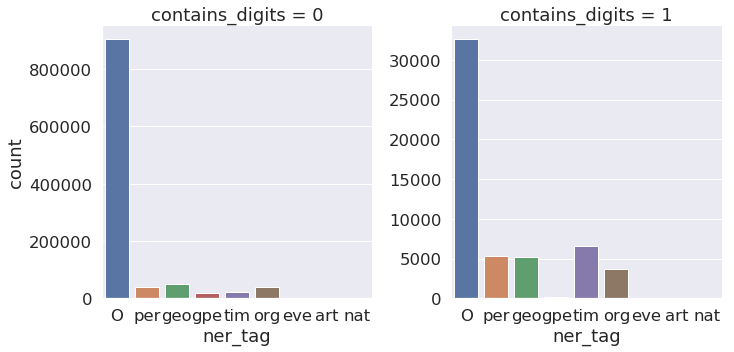

In [36]:
sns.catplot('ner_tag', col='contains_digits', data=tagged_texts_as_pd_f_add_f, kind="count", sharex=False, sharey=False)
plt.show()

## Distribution of lambda-DSR mean lengths across NER-tags

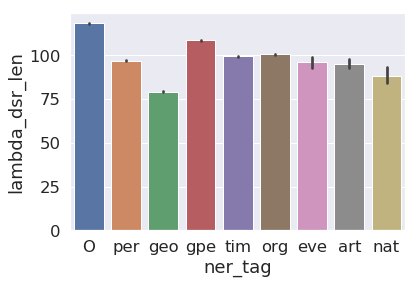

In [37]:
sns.barplot("ner_tag", "lambda_dsr_len", data=tagged_texts_as_pd_f_add_f)
plt.show()

## Distribution of word mean lengths across NER-tags

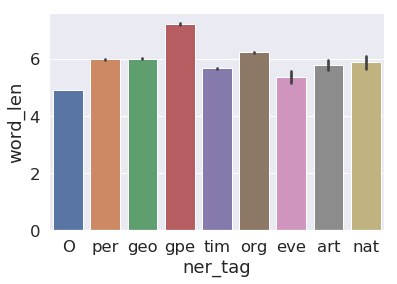

In [38]:
sns.barplot("ner_tag", "word_len", data=tagged_texts_as_pd_f_add_f)
plt.show()

# Conclusion